<a href="https://colab.research.google.com/github/derrickny/apiheroku/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn import svm

In [ ]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/JUNE/data/PimaIndians.csv')

### Exploratory Data Analysis

In [ ]:
#Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#summary statistics
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [ ]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Check data types of columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

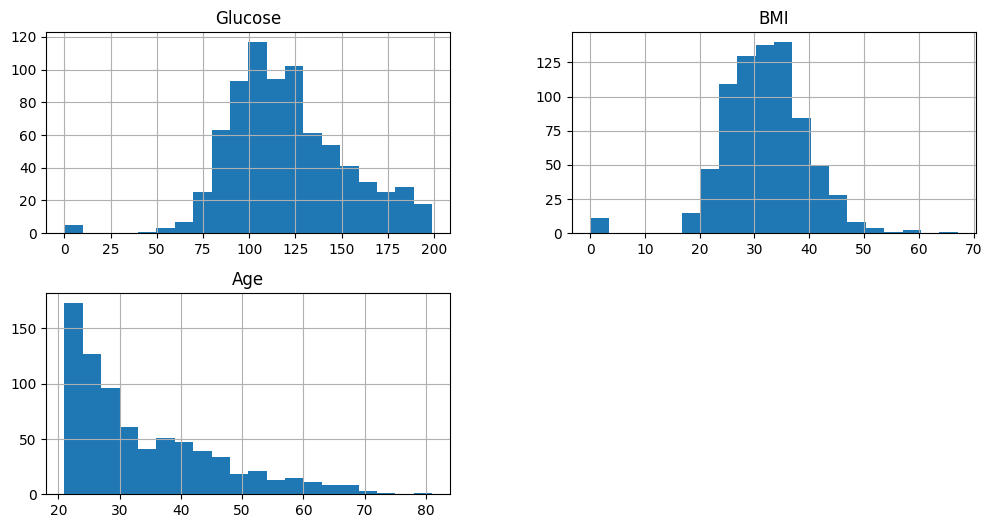

In [ ]:
#Glucose,' 'BMI,' and 'Age' to understand their spread.
df.hist(column=['Glucose', 'BMI', 'Age'], bins=20, figsize=(12, 6))
plt.show()

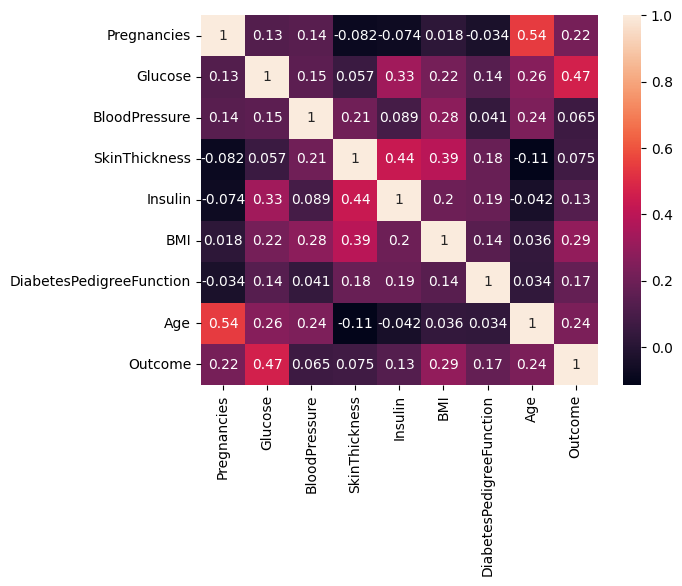

In [ ]:
# features correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

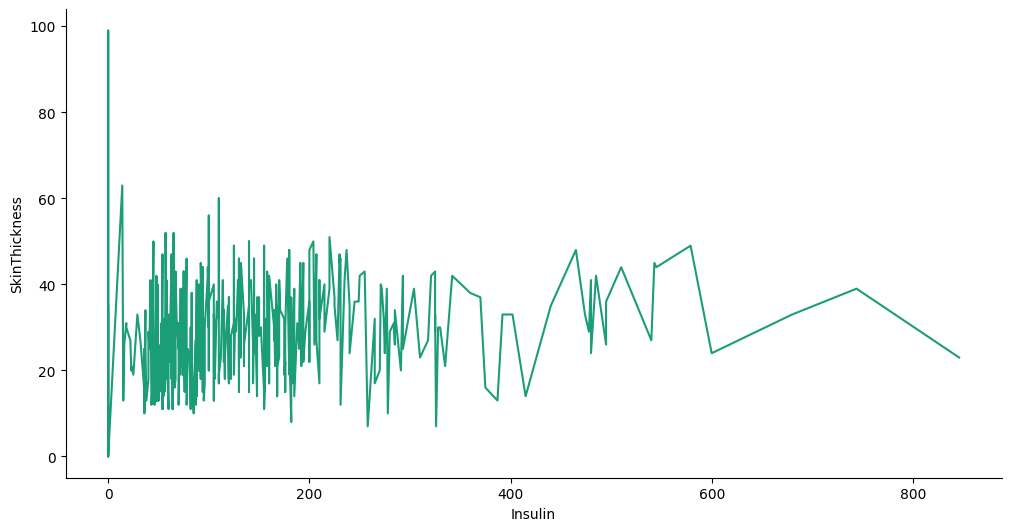

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Insulin']
    ys = series['SkinThickness']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])


fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted = df.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('SkinThickness')


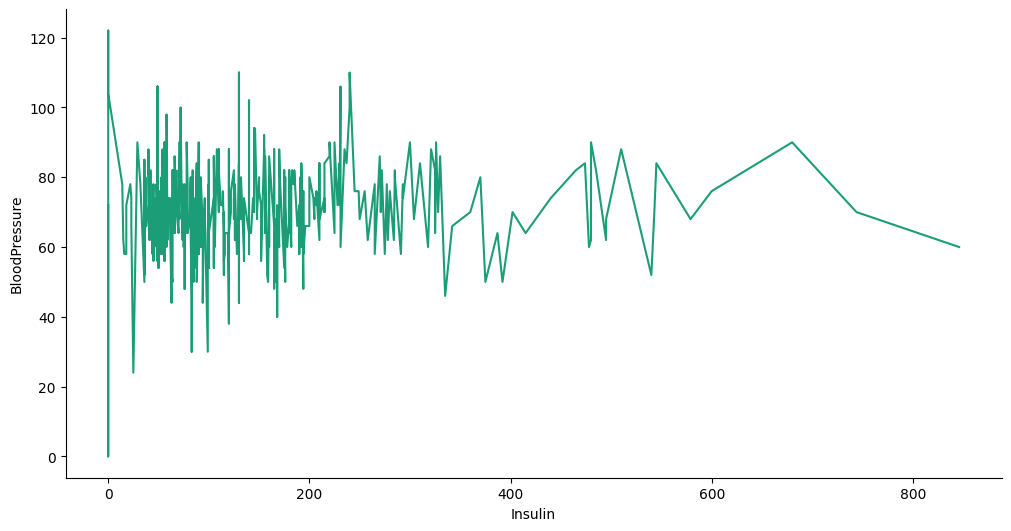

In [ ]:

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['BloodPressure']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('BloodPressure')

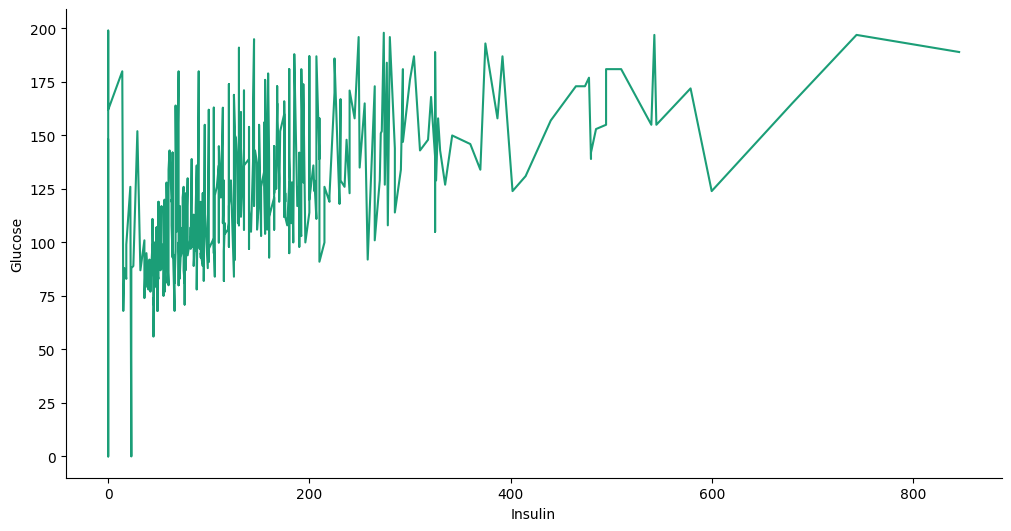

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Insulin']
  ys = series['Glucose']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Insulin', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Insulin')
_ = plt.ylabel('Glucose')

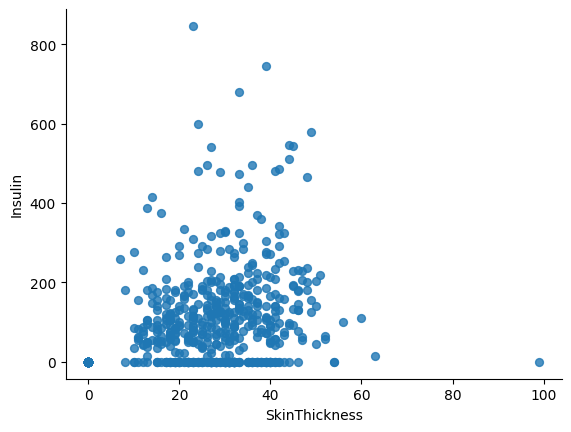

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

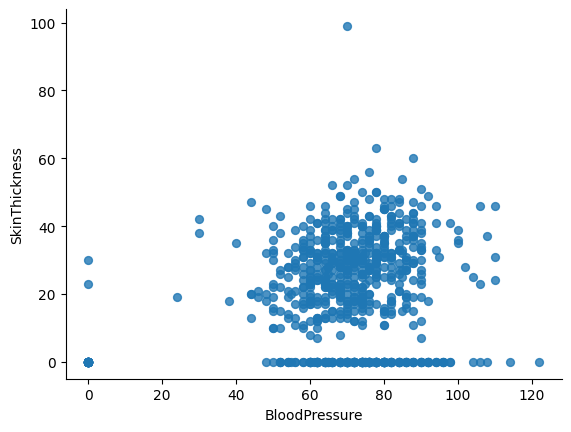

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

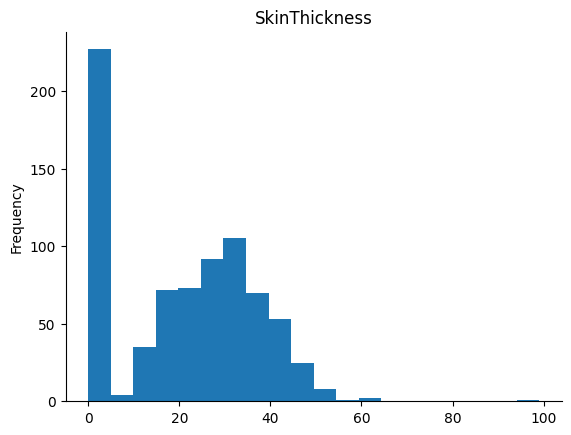

In [ ]:
from matplotlib import pyplot as plt
df['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

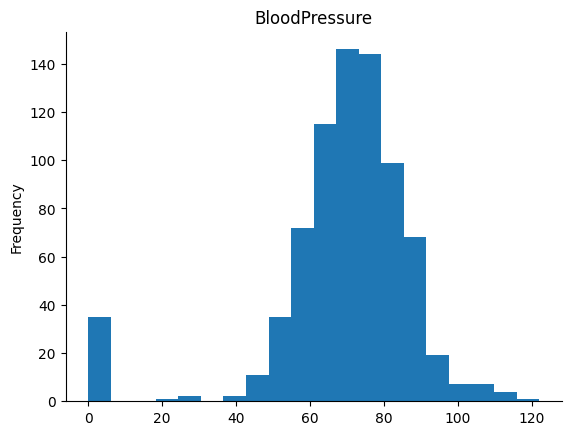

In [ ]:
from matplotlib import pyplot as plt
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

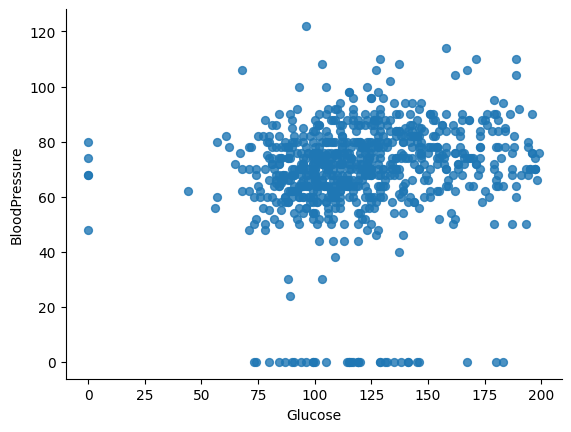

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

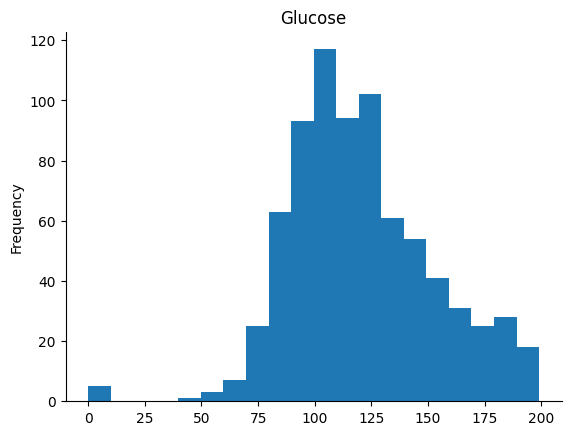

In [ ]:
from matplotlib import pyplot as plt
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

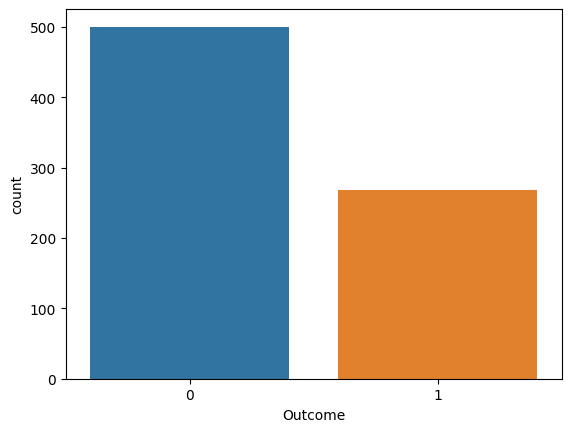

In [ ]:
#the outcome balance
sns.countplot(x='Outcome', data=df)
plt.show()

The plot shows that there more without diabetes as compared to those with diabetes

#### MODEL BUILDING

In [ ]:
#drop the columns we dont need
df = df.drop(columns=['DiabetesPedigreeFunction'])

In [ ]:
#import libaries to aid in model building
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
import h5py
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train various models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

# Evaluate the best model
print(f"The best model is: {best_model}")

Logistic Regression Accuracy: 0.73
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.73
Gradient Boosting Accuracy: 0.74
SVM Accuracy: 0.71
The best model is: Gradient Boosting


In [ ]:
#Ensemble of the trained models

# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()

# Create a list of tuples with each model and its name
models = [
    ("Logistic Regression", logistic_regression),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("SVM", svm)
]

# Create a VotingClassifier ensemble
voting_classifier = VotingClassifier(estimators=models, voting='hard')

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_accuracy = voting_classifier.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")


Ensemble Model Accuracy: 0.73


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a neural network with more layers, dropout, and increased epochs
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with L2 regularization
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback to monitor training progress
callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model with more epochs and use the callback
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

Epoch 1/1000
20/20 [==============================] - 2s 15ms/step - loss: 0.6707 - accuracy: 0.6221 - val_loss: 0.6637 - val_accuracy: 0.6494
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.6531 - val_loss: 0.6349 - val_accuracy: 0.6429
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.6515 - val_loss: 0.6095 - val_accuracy: 0.6429
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.6580 - val_loss: 0.5937 - val_accuracy: 0.6429
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.6531 - val_loss: 0.5818 - val_accuracy: 0.6429
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.5739 - accuracy: 0.6629 - val_loss: 0.5723 - val_accuracy: 0.6494
Epoch 7/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.6645 - val_loss: 0.5688 - val_accuracy: 0.6364
Epoch

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4780 - accuracy: 0.7850 - val_loss: 0.5206 - val_accuracy: 0.7532
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7590 - val_loss: 0.5230 - val_accuracy: 0.7403
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7606 - val_loss: 0.5271 - val_accuracy: 0.7597
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.7541 - val_loss: 0.5290 - val_accuracy: 0.7597
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7736 - val_loss: 0.5287 - val_accuracy: 0.7468
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7476 - val_loss: 0.5298 - val_accuracy: 0.7468
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4750 - accuracy: 0.7524 - val_loss: 0.5319 - val_accuracy: 0.7532
Epoch 8/100
2

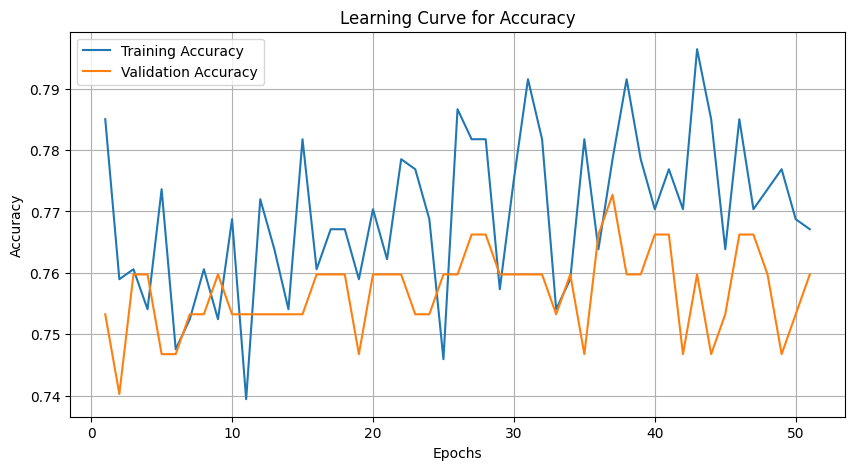

In [ ]:
# To check for overfitting and underfitting
# Train the model with more epochs and use the callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback], verbose=1)

# Extract training and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the learning curve for accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Learning Curve for Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

After traning of the models the Neural network gave an acccuray(75%) . The summary of what was done :

The architecture of the neural network is as follows:

Input layer with 10 neurons and ReLU activation function.




* Dropout layer with a dropout rate of 0.2, which helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
* Hidden layer with 50 neurons and ReLU activation function.
* Dropout layer with a dropout rate of 0.2.
* Hidden layer with 10 neurons and ReLU activation function.
* Dropout layer with a dropout rate of 0.2.
* Hidden layer with 5 neurons and ReLU activation function.
* Dropout layer with a dropout rate of 0.2.
* Output layer with 1 neuron and sigmoid activation function, as * it's a binary classification problem.
* The model is compiled using the Adam optimizer, binary cross-entropy loss function (suitable for binary classification problems), and accuracy as the metric. The training is monitored using an EarlyStopping callback, which stops training when a monitored metric has stopped improving.

The model is then trained for 1000 epochs, and the training is stopped early if there is no improvement in the validation loss for 50 consecutive epochs. Finally, the model is evaluated on the test set, and the accuracy is printed.

In [ ]:
# Save the model
model.save('diabetes_prediction_model.h5')

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.2f}")

5/5 [==============================] - 0s 3ms/step
Neural Network Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_data = {
    'Pregnancies': [3],
    'Glucose': [150],
    'BloodPressure': [75],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [30],
    'Age': [40]
}

# Create a DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the features
test_df_scaled = scaler.transform(test_df)

# Define a mapping for binary predictions to text labels
outcome_mapping = {0: 'No Diabetes', 1: 'Diabetic'}

# Convert binary predictions to text labels
predicted_labels = predictions.flatten()
text_labels = [outcome_mapping[label] for label in predicted_labels]

print("Predictions:", text_labels)

Predictions: ['Diabetic']


In [ ]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7752442996742671


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


In [ ]:
# Input data
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to a dictionary with feature names
input_dict = {
    'Pregnancies': int(input_data[0]),
    'Glucose': int(input_data[1]),
    'BloodPressure': int(input_data[2]),
    'SkinThickness': int(input_data[3]),
    'Insulin': int(input_data[4]),
    'BMI': float(input_data[5]),
    'Age': int(input_data[7])  # I assume you meant to skip the 6th element (0.587)
}

# Create a DataFrame from the dictionary
input_df = pd.DataFrame([input_dict])

# Use the trained model to make predictions
prediction = model.predict(input_df)

# Output the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

1/1 [==============================] - 0s 128ms/step
The person is diabetic


In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
Age
